In [8]:
import os
import sys
import numpy as np
from sting.classifier import Classifier
from sting.data import Feature, FeatureType, parse_c45
# Add the 'src' directory to sys.path
cwd = os.getcwd()
project_root = os.path.abspath(os.path.join(cwd, '..'))  # Adjust as needed
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Import dtree function and other necessary components from dtree.py
from dtree import dtree, DecisionTree, evaluate_and_print_metrics,parse_c45

# Import util if needed
import util

# For data loading
from sting.data import parse_c45

# Set data path
data_path = os.path.join(project_root, '440data')  # Adjust as needed

# Verify the data path
print("Data path:", data_path)


Data path: /mnt/c/Users/ravir/CWRU/ML/csds440-f24-11/Programming_1/440data


Tree depth for N=50: 4
Tree depth for N=100: 7
Tree depth for N=500: 9
Tree depth for N=1000: 11
Tree depth for N=5000: 12


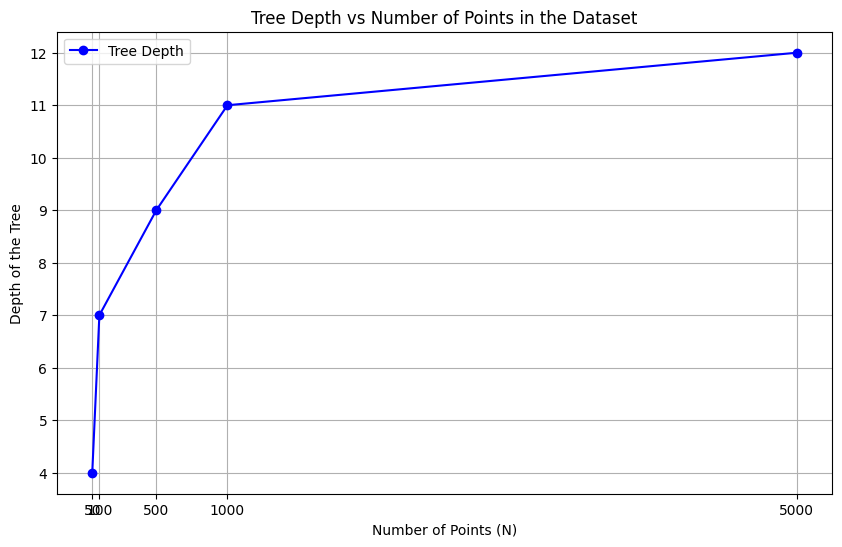

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle  # To shuffle the data (optional)

# Step 1: Generate points and label them
def generate_data(N):
    """
    Generates N points from (-1, 1)^2 and labels them using y = sign(0.5x1 + 0.5x2).
    
    Args:
        N: Number of points to generate.
        
    Returns:
        X: A numpy array of shape (N, 2) with random points from (-1, 1)^2.
        y: A numpy array of shape (N,) with labels for the points.
    """
    X = np.random.uniform(-1, 1, size=(N, 2))  # N points in (-1, 1)^2
    y = np.sign(0.5 * X[:, 0] + 0.5 * X[:, 1])  # Classifier: sign(0.5x1 + 0.5x2)
    return X, y

# Step 2: Use your ID3 implementation to learn trees
def train_id3_and_get_depth(X, y):
    """
    Trains an ID3 decision tree (using the provided ID3 implementation) and returns the depth of the tree.
    
    Args:
        X: Training data (N, 2)
        y: Labels (N,)
    
    Returns:
        depth: Depth of the learned decision tree.
    """
    # Use your existing ID3 code here
    # Replace `DecisionTreeClassifier` with your actual ID3 implementation from Programming 1
    schema = [Feature(name='x1', ftype=FeatureType.CONTINUOUS),
              Feature(name='x2', ftype=FeatureType.CONTINUOUS)]

    decision_tree = DecisionTree(schema=schema)
    decision_tree.fit(X, y)
    
    # Return the depth of the tree
    return decision_tree.get_max_depth()

# Step 3: Experiment with different values of N and plot the depth of the tree
N_values = [50, 100, 500, 1000, 5000]  # Different dataset sizes
tree_depths = []

for N in N_values:
    # Generate data
    X, y = generate_data(N)
    
    # Shuffle the data (optional, but sometimes useful)
    X, y = shuffle(X, y, random_state=42)
    
    # Train the ID3 tree and get the depth
    depth = train_id3_and_get_depth(X, y)
    
    # Store the result
    tree_depths.append(depth)
    print(f"Tree depth for N={N}: {depth}")

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, tree_depths, marker='o', color='b', label='Tree Depth')
plt.xlabel('Number of Points (N)')
plt.ylabel('Depth of the Tree')
plt.title('Tree Depth vs Number of Points in the Dataset')
plt.grid(True)
plt.xticks(N_values)
plt.legend()
plt.show()
